<a href="https://colab.research.google.com/github/annvorosh/GB/blob/DAmed/DAmed_L02_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!cp /content/drive/MyDrive/DAmed/clinical.project-tcga-lgg.2023-11-17.tar.gz /content/


In [3]:
import tarfile
tar = tarfile.open('clinical.project-tcga-lgg.2023-11-17.tar.gz')
tar.extractall()
tar.close()

In [4]:
import pandas as pd

# Считаем файл clinical.tsv в датафрейм
file_path = 'clinical.tsv'  # Путь к файлу, укажите правильный путь

# Загрузка данных в датафрейм
data = pd.read_csv(file_path, sep='\t')
data.head()

,case_id,case_submitter_id,project_id,age_at_index,age_is_obfuscated,cause_of_death,cause_of_death_source,country_of_residence_at_enrollment,days_to_birth,days_to_death,...,treatment_arm,treatment_dose,treatment_dose_units,treatment_effect,treatment_effect_indicator,treatment_frequency,treatment_intent_type,treatment_or_therapy,treatment_outcome,treatment_type
0,001ad307-4ad3-4f1d-b2fc-efc032871c7e,TCGA-HT-A614,TCGA-LGG,47,'--,'--,'--,'--,-17392,'--,...,'--,'--,'--,'--,'--,'--,'--,not reported,'--,"Pharmaceutical Therapy, NOS"
1,001ad307-4ad3-4f1d-b2fc-efc032871c7e,TCGA-HT-A614,TCGA-LGG,47,'--,'--,'--,'--,-17392,'--,...,'--,'--,'--,'--,'--,'--,'--,not reported,'--,"Radiation Therapy, NOS"
2,0061e9ef-df6a-414e-af64-c88f8192e2d3,TCGA-E1-5311,TCGA-LGG,31,'--,'--,'--,'--,-11332,4084,...,'--,'--,'--,'--,'--,'--,'--,yes,'--,"Radiation Therapy, NOS"
3,0061e9ef-df6a-414e-af64-c88f8192e2d3,TCGA-E1-5311,TCGA-LGG,31,'--,'--,'--,'--,-11332,4084,...,'--,'--,'--,'--,'--,'--,'--,yes,'--,"Pharmaceutical Therapy, NOS"
4,0073a136-d5f4-4fd6-88f9-711768f2abc6,TCGA-VM-A8CF,TCGA-LGG,44,'--,'--,'--,'--,-16334,'--,...,'--,'--,'--,'--,'--,'--,'--,yes,'--,"Radiation Therapy, NOS"


In [5]:
# Удаление повторяющихся строк
data.drop_duplicates(inplace=True)

In [ ]:
data.shape[0]

Этот датасет представляет собой клинические данные пациентов, связанные с проектом TCGA-LGG (The Cancer Genome Atlas - Lower Grade Glioma) и фокусируется на исследовании низкого градуса глиомы, что является формой рака головного мозга.

In [6]:
# список всех столбцов
columns_list = data.columns.tolist()
for column in columns_list:
    print(column)

case_id
case_submitter_id
project_id
age_at_index
age_is_obfuscated
cause_of_death
cause_of_death_source
country_of_residence_at_enrollment
days_to_birth
days_to_death
ethnicity
gender
occupation_duration_years
premature_at_birth
race
vital_status
weeks_gestation_at_birth
year_of_birth
year_of_death
adrenal_hormone
age_at_diagnosis
ajcc_clinical_m
ajcc_clinical_n
ajcc_clinical_stage
ajcc_clinical_t
ajcc_pathologic_m
ajcc_pathologic_n
ajcc_pathologic_stage
ajcc_pathologic_t
ajcc_staging_system_edition
anaplasia_present
anaplasia_present_type
ann_arbor_b_symptoms
ann_arbor_b_symptoms_described
ann_arbor_clinical_stage
ann_arbor_extranodal_involvement
ann_arbor_pathologic_stage
best_overall_response
breslow_thickness
burkitt_lymphoma_clinical_variant
child_pugh_classification
circumferential_resection_margin
classification_of_tumor
cog_liver_stage
cog_neuroblastoma_risk_group
cog_renal_stage
cog_rhabdomyosarcoma_risk_group
days_to_best_overall_response
days_to_diagnosis
days_to_last_follo

In [7]:
import numpy as np

# Замена "'--" на NaN
data.replace("'--", np.nan, inplace=True)

In [8]:
# столбцы, где все значения пропущены
empty_columns = data.columns[data.isnull().all()]
print("Столбцы, где все значения пропущены:")
print(empty_columns)

Столбцы, где все значения пропущены:
Index(['age_is_obfuscated', 'cause_of_death', 'cause_of_death_source',
       'country_of_residence_at_enrollment', 'occupation_duration_years',
       'premature_at_birth', 'weeks_gestation_at_birth', 'adrenal_hormone',
       'ajcc_clinical_m', 'ajcc_clinical_n',
       ...
       'therapeutic_agents', 'treatment_anatomic_site', 'treatment_arm',
       'treatment_dose', 'treatment_dose_units', 'treatment_effect',
       'treatment_effect_indicator', 'treatment_frequency',
       'treatment_intent_type', 'treatment_outcome'],
      dtype='object', length=128)


In [9]:
data.dropna(axis=1, how='all', inplace=True)
data.head()

,case_id,case_submitter_id,project_id,age_at_index,days_to_birth,days_to_death,ethnicity,gender,race,vital_status,...,prior_malignancy,prior_treatment,progression_or_recurrence,site_of_resection_or_biopsy,synchronous_malignancy,tissue_or_organ_of_origin,tumor_grade,year_of_diagnosis,treatment_or_therapy,treatment_type
0,001ad307-4ad3-4f1d-b2fc-efc032871c7e,TCGA-HT-A614,TCGA-LGG,47,-17392,NaN,not hispanic or latino,male,white,Alive,...,no,No,not reported,Cerebrum,No,Cerebrum,not reported,2013,not reported,"Pharmaceutical Therapy, NOS"
1,001ad307-4ad3-4f1d-b2fc-efc032871c7e,TCGA-HT-A614,TCGA-LGG,47,-17392,NaN,not hispanic or latino,male,white,Alive,...,no,No,not reported,Cerebrum,No,Cerebrum,not reported,2013,not reported,"Radiation Therapy, NOS"
2,0061e9ef-df6a-414e-af64-c88f8192e2d3,TCGA-E1-5311,TCGA-LGG,31,-11332,4084,not hispanic or latino,male,white,Dead,...,no,No,not reported,"Brain, NOS",No,"Brain, NOS",not reported,1994,yes,"Radiation Therapy, NOS"
3,0061e9ef-df6a-414e-af64-c88f8192e2d3,TCGA-E1-5311,TCGA-LGG,31,-11332,4084,not hispanic or latino,male,white,Dead,...,no,No,not reported,"Brain, NOS",No,"Brain, NOS",not reported,1994,yes,"Pharmaceutical Therapy, NOS"
4,0073a136-d5f4-4fd6-88f9-711768f2abc6,TCGA-VM-A8CF,TCGA-LGG,44,-16334,NaN,not reported,female,white,Alive,...,no,No,not reported,Cerebrum,No,Cerebrum,not reported,2013,yes,"Radiation Therapy, NOS"


Столбец vital_status в данном контексте может служить потенциальным таргетом или целевой переменной. Он содержит информацию о том, жив ли пациент на момент записи данных (Alive) или умер (Dead). Этот столбец может быть использован для предсказания выживаемости пациентов или для классификации на основе статуса выживания.

In [10]:
# список всех столбцов
columns_list = data.columns.tolist()
for column in columns_list:
    print(column)

case_id
case_submitter_id
project_id
age_at_index
days_to_birth
days_to_death
ethnicity
gender
race
vital_status
year_of_birth
year_of_death
age_at_diagnosis
classification_of_tumor
days_to_diagnosis
days_to_last_follow_up
icd_10_code
last_known_disease_status
morphology
primary_diagnosis
prior_malignancy
prior_treatment
progression_or_recurrence
site_of_resection_or_biopsy
synchronous_malignancy
tissue_or_organ_of_origin
tumor_grade
year_of_diagnosis
treatment_or_therapy
treatment_type


- **case_id**: Уникальный идентификатор случая или пациента.
- **case_submitter_id**: Идентификатор подавшего заявку на случай.
- **project_id**: Идентификатор проекта, в контексте данного набора данных это проект TCGA-LGG.
- **age_at_index**: Возраст пациента на момент индекса (время начала наблюдения или диагностики).
- **days_to_birth**: Количество дней от момента индекса до дня рождения.
- **days_to_death**: Количество дней от момента индекса до смерти (если применимо).
- **ethnicity**: Этническая принадлежность пациента.
- **gender**: Пол пациента.
- **race**: Раса пациента.
- **vital_status**: Статус жизни пациента на момент записи данных (жив или умер).
- **year_of_birth**: Год рождения пациента.
- **year_of_death**: Год смерти пациента (если применимо).
- **age_at_diagnosis**: Возраст пациента на момент диагностики.
- **classification_of_tumor**: Классификация опухоли.
- **days_to_diagnosis**: Количество дней от индекса до диагностики.
- **days_to_last_follow_up**: Количество дней до последнего наблюдения за пациентом.
- **icd_10_code**: Код по Международной классификации болезней (ICD-10).
- **last_known_disease_status**: Статус последнего известного заболевания.
- **morphology**: Морфология или тип опухоли.
- **primary_diagnosis**: Основной диагноз пациента.
- **prior_malignancy**: Наличие предшествующих злокачественных опухолей.
- **prior_treatment**: Наличие предыдущего лечения.
- **progression_or_recurrence**: Прогрессирование или рецидив заболевания.
- **site_of_resection_or_biopsy**: Место резекции или биопсии.
- **synchronous_malignancy**: Синхронное злокачественное заболевание.
- **tissue_or_organ_of_origin**: Ткань или орган происхождения опухоли.
- **tumor_grade**: Степень злокачественности опухоли.
- **year_of_diagnosis**: Год диагностики.
- **treatment_or_therapy**: Лечение или терапия.
- treatment_type: Тип лечения или терапии.

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031 entries, 0 to 1030
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   case_id                      1031 non-null   object
 1   case_submitter_id            1031 non-null   object
 2   project_id                   1031 non-null   object
 3   age_at_index                 1030 non-null   object
 4   days_to_birth                1028 non-null   object
 5   days_to_death                250 non-null    object
 6   ethnicity                    1030 non-null   object
 7   gender                       1030 non-null   object
 8   race                         1030 non-null   object
 9   vital_status                 1030 non-null   object
 10  year_of_birth                1030 non-null   object
 11  year_of_death                184 non-null    object
 12  age_at_diagnosis             1028 non-null   object
 13  classification_of_tumor      1030

In [12]:
data.columns

Index(['case_id', 'case_submitter_id', 'project_id', 'age_at_index',
       'days_to_birth', 'days_to_death', 'ethnicity', 'gender', 'race',
       'vital_status', 'year_of_birth', 'year_of_death', 'age_at_diagnosis',
       'classification_of_tumor', 'days_to_diagnosis',
       'days_to_last_follow_up', 'icd_10_code', 'last_known_disease_status',
       'morphology', 'primary_diagnosis', 'prior_malignancy',
       'prior_treatment', 'progression_or_recurrence',
       'site_of_resection_or_biopsy', 'synchronous_malignancy',
       'tissue_or_organ_of_origin', 'tumor_grade', 'year_of_diagnosis',
       'treatment_or_therapy', 'treatment_type'],
      dtype='object')

In [13]:
columns_to_convert = ['age_at_index',
                      'days_to_birth',
                      'days_to_death',
                      'year_of_birth',
                      'year_of_death',
                      'age_at_diagnosis',
                      'year_of_diagnosis',
                      'days_to_diagnosis',
                      'days_to_last_follow_up']

for column in columns_to_convert:
    data[column] = pd.to_numeric(data[column], errors='coerce', downcast='integer')
    # Преобразование типов данных float в int
    data[columns_to_convert] = data[columns_to_convert].astype('Int16')

# Проверка преобразования
data.dtypes()

case_id                        object
case_submitter_id              object
project_id                     object
age_at_index                    Int16
days_to_birth                   Int16
days_to_death                   Int16
ethnicity                      object
gender                         object
race                           object
vital_status                   object
year_of_birth                   Int16
year_of_death                   Int16
age_at_diagnosis                Int16
classification_of_tumor        object
days_to_diagnosis               Int16
days_to_last_follow_up          Int16
icd_10_code                    object
last_known_disease_status      object
morphology                     object
primary_diagnosis              object
prior_malignancy               object
prior_treatment                object
progression_or_recurrence      object
site_of_resection_or_biopsy    object
synchronous_malignancy         object
tissue_or_organ_of_origin      object
tumor_grade 

In [14]:
data.iloc[0]

case_id                        001ad307-4ad3-4f1d-b2fc-efc032871c7e
case_submitter_id                                      TCGA-HT-A614
project_id                                                 TCGA-LGG
age_at_index                                                     47
days_to_birth                                                -17392
days_to_death                                                  <NA>
ethnicity                                    not hispanic or latino
gender                                                         male
race                                                          white
vital_status                                                  Alive
year_of_birth                                                  1966
year_of_death                                                  <NA>
age_at_diagnosis                                              17392
classification_of_tumor                                not reported
days_to_diagnosis                               

In [15]:
data.describe()

,age_at_index,days_to_birth,days_to_death,year_of_birth,year_of_death,age_at_diagnosis,days_to_diagnosis,days_to_last_follow_up,year_of_diagnosis
count,1030.0,1028.0,250.0,1030.0,184.0,1028.0,1030.0,846.0,1030.0
mean,42.941748,-15862.624514,1219.008,1966.198058,2005.891304,15862.624514,0.0,889.392435,2009.139806
std,13.349183,4877.520426,1143.896683,14.132498,5.010277,4877.520426,0.0,906.723387,4.42713
min,14.0,-31776.0,7.0,1912.0,1995.0,5267.0,0.0,-1.0,1992.0
25%,32.0,-19610.0,438.0,1956.25,2002.0,11970.0,0.0,371.25,2008.0
50%,41.0,-15048.0,814.0,1968.0,2007.5,15048.0,0.0,623.0,2011.0
75%,53.0,-11970.0,1547.0,1977.0,2010.0,19610.0,0.0,1145.0,2012.0
max,87.0,-5267.0,5166.0,1993.0,2013.0,31776.0,0.0,6423.0,2013.0


In [16]:
data['days_to_diagnosis'].unique

<bound method Series.unique of 0       0
1       0
2       0
3       0
4       0
       ..
1026    0
1027    0
1028    0
1029    0
1030    0
Name: days_to_diagnosis, Length: 1031, dtype: Int16>

In [17]:
# еще одна фича оказалась не имеющей смысла
data.drop('days_to_diagnosis', axis=1, inplace=True)

In [18]:
# Замена пропущенных значений в days_to_death для живых пациентов
data.loc[data['vital_status'] == 'Alive', 'days_to_death'] = np.nan

In [19]:
# Получение списка категориальных переменных
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
categorical_columns

['case_id',
 'case_submitter_id',
 'project_id',
 'ethnicity',
 'gender',
 'race',
 'vital_status',
 'classification_of_tumor',
 'icd_10_code',
 'last_known_disease_status',
 'morphology',
 'primary_diagnosis',
 'prior_malignancy',
 'prior_treatment',
 'progression_or_recurrence',
 'site_of_resection_or_biopsy',
 'synchronous_malignancy',
 'tissue_or_organ_of_origin',
 'tumor_grade',
 'treatment_or_therapy',
 'treatment_type']

In [20]:
# Вывод уникальных значений для каждой категориальной переменной
for column in categorical_columns:
    print(f"\nУникальные значения для {column}:")
    print(data[column].value_counts())
    print()


Уникальные значения для case_id:
001ad307-4ad3-4f1d-b2fc-efc032871c7e    2
c0d47e0f-4918-4e06-9db6-201671b1259c    2
b10a9314-fd40-459e-97ea-affc636dceea    2
b027ab77-70eb-4877-91a3-702064d9cc8b    2
ae61a71e-53a1-4884-a4a6-729744d1c309    2
                                       ..
5469c0e8-0c58-4870-b897-8fa0704599a7    2
5119aceb-ad95-4904-b6c0-a0a4b42c17d0    2
50975570-c0d5-4ee7-9226-40b3db1bde84    2
fff304a2-113f-499d-a88c-9d3660c348d9    2
bc66f21c-7ae6-4312-b6c1-ea3e19f90485    1
Name: case_id, Length: 516, dtype: int64


Уникальные значения для case_submitter_id:
TCGA-HT-A614    2
TCGA-DU-6404    2
TCGA-S9-A6U8    2
TCGA-HT-7684    2
TCGA-DB-A4XA    2
               ..
TCGA-FG-8189    2
TCGA-R8-A6ML    2
TCGA-VM-A8C9    2
TCGA-RY-A847    2
TCGA-R8-A6YH    1
Name: case_submitter_id, Length: 516, dtype: int64


Уникальные значения для project_id:
TCGA-LGG    1031
Name: project_id, dtype: int64


Уникальные значения для ethnicity:
not hispanic or latino    898
not reported    

In [25]:
columns_to_drop = ['project_id', 'classification_of_tumor', 'last_known_disease_status', 'progression_or_recurrence', 'tumor_grade']
data.drop(columns=columns_to_drop, axis=1, inplace=True)

In [28]:
# Получение списка категориальных переменных
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

# Вывод уникальных значений для каждой категориальной переменной
for column in categorical_columns:
    print(f"\nУникальные значения для {column}:")
    print(data[column].value_counts())
    print()


Уникальные значения для case_id:
001ad307-4ad3-4f1d-b2fc-efc032871c7e    2
c0d47e0f-4918-4e06-9db6-201671b1259c    2
b10a9314-fd40-459e-97ea-affc636dceea    2
b027ab77-70eb-4877-91a3-702064d9cc8b    2
ae61a71e-53a1-4884-a4a6-729744d1c309    2
                                       ..
5469c0e8-0c58-4870-b897-8fa0704599a7    2
5119aceb-ad95-4904-b6c0-a0a4b42c17d0    2
50975570-c0d5-4ee7-9226-40b3db1bde84    2
fff304a2-113f-499d-a88c-9d3660c348d9    2
bc66f21c-7ae6-4312-b6c1-ea3e19f90485    1
Name: case_id, Length: 516, dtype: int64


Уникальные значения для case_submitter_id:
TCGA-HT-A614    2
TCGA-DU-6404    2
TCGA-S9-A6U8    2
TCGA-HT-7684    2
TCGA-DB-A4XA    2
               ..
TCGA-FG-8189    2
TCGA-R8-A6ML    2
TCGA-VM-A8C9    2
TCGA-RY-A847    2
TCGA-R8-A6YH    1
Name: case_submitter_id, Length: 516, dtype: int64


Уникальные значения для ethnicity:
not hispanic or latino    898
not reported               68
hispanic or latino         64
Name: ethnicity, dtype: int64


Уникальные

In [29]:
# Взаимосвязь категориальных переменных с целевой переменной
for var in categorical_columns:
    print(data.groupby(var)['vital_status'].apply(lambda x: (x == 'Dead').sum() / len(x) * 100))

case_id
001ad307-4ad3-4f1d-b2fc-efc032871c7e      0.0
0061e9ef-df6a-414e-af64-c88f8192e2d3    100.0
0073a136-d5f4-4fd6-88f9-711768f2abc6      0.0
00b18ad6-ff70-41fe-8f4d-0763ac8f28b9      0.0
010aac75-3bfe-4bf2-b866-af0f2d92f125      0.0
                                        ...  
fea46eef-6b7f-44c3-93bf-2dec16bdeb79      0.0
febe2ce5-737b-43b8-bc70-4194fe3ed5fb      0.0
fee2114e-f723-4374-91f8-f1dcc6b3eaee    100.0
ffcec8e5-9fd3-4b42-a7cb-74761f713cf4      0.0
fff304a2-113f-499d-a88c-9d3660c348d9      0.0
Name: vital_status, Length: 516, dtype: float64
case_submitter_id
TCGA-CS-4938      0.0
TCGA-CS-4941    100.0
TCGA-CS-4942    100.0
TCGA-CS-4943    100.0
TCGA-CS-4944      0.0
                ...  
TCGA-WY-A85A      0.0
TCGA-WY-A85B      0.0
TCGA-WY-A85C      0.0
TCGA-WY-A85D      0.0
TCGA-WY-A85E      0.0
Name: vital_status, Length: 516, dtype: float64
ethnicity
hispanic or latino        12.500000
not hispanic or latino    25.389755
not reported              23.529412
Name: vital_

In [30]:
# Подсчет пропущенных значений по столбцам
missing_values = data.isnull().sum()

# Отображение столбцов с пропущенными значениями
missing_values[missing_values > 0]

age_at_index                     1
days_to_birth                    3
days_to_death                  781
ethnicity                        1
gender                           1
race                             1
vital_status                     1
year_of_birth                    1
year_of_death                  847
age_at_diagnosis                 3
days_to_last_follow_up         185
icd_10_code                      1
morphology                       1
primary_diagnosis                1
prior_malignancy                 1
prior_treatment                  1
site_of_resection_or_biopsy      1
synchronous_malignancy           1
tissue_or_organ_of_origin        1
year_of_diagnosis                1
treatment_or_therapy             1
treatment_type                   1
dtype: int64

In [33]:
# Предположим, что мы ищем пропущенные значения в столбце 'age_at_index'
missing_age_at_index = data[data['age_at_index'].isnull()]
missing_age_at_index

,case_id,case_submitter_id,age_at_index,days_to_birth,days_to_death,ethnicity,gender,race,vital_status,year_of_birth,...,morphology,primary_diagnosis,prior_malignancy,prior_treatment,site_of_resection_or_biopsy,synchronous_malignancy,tissue_or_organ_of_origin,year_of_diagnosis,treatment_or_therapy,treatment_type
758,bc66f21c-7ae6-4312-b6c1-ea3e19f90485,TCGA-R8-A6YH,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN,<NA>,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN


In [34]:
data.dropna(subset=['age_at_index'], inplace=True)

In [36]:
# пропущенные значения в столбце 'days_to_birth'
missing_age_at_index = data[data['days_to_birth'].isnull()]
missing_age_at_index

,case_id,case_submitter_id,age_at_index,days_to_birth,days_to_death,ethnicity,gender,race,vital_status,year_of_birth,...,morphology,primary_diagnosis,prior_malignancy,prior_treatment,site_of_resection_or_biopsy,synchronous_malignancy,tissue_or_organ_of_origin,year_of_diagnosis,treatment_or_therapy,treatment_type
464,732df38e-d32c-4d63-ac97-ad655e2e5732,TCGA-W9-A837,47,<NA>,<NA>,not hispanic or latino,male,white,Alive,1963,...,9450/3,"Oligodendroglioma, NOS",no,No,Cerebrum,No,Cerebrum,2010,no,"Radiation Therapy, NOS"
465,732df38e-d32c-4d63-ac97-ad655e2e5732,TCGA-W9-A837,47,<NA>,<NA>,not hispanic or latino,male,white,Alive,1963,...,9450/3,"Oligodendroglioma, NOS",no,No,Cerebrum,No,Cerebrum,2010,no,"Pharmaceutical Therapy, NOS"


In [44]:
data.drop(464, inplace=True)


In [45]:
# пропущенные значения в столбце 'days_to_birth'
missing_age_at_index = data[data['days_to_birth'].isnull()]
missing_age_at_index

,case_id,case_submitter_id,age_at_index,days_to_birth,days_to_death,ethnicity,gender,race,vital_status,year_of_birth,...,morphology,primary_diagnosis,prior_malignancy,prior_treatment,site_of_resection_or_biopsy,synchronous_malignancy,tissue_or_organ_of_origin,year_of_diagnosis,treatment_or_therapy,treatment_type
465,732df38e-d32c-4d63-ac97-ad655e2e5732,TCGA-W9-A837,47,<NA>,<NA>,not hispanic or latino,male,white,Alive,1963,...,9450/3,"Oligodendroglioma, NOS",no,No,Cerebrum,No,Cerebrum,2010,no,"Pharmaceutical Therapy, NOS"


In [38]:
# Подсчет пропущенных значений по столбцам
missing_values = data.isnull().sum()

# Отображение столбцов с пропущенными значениями
missing_values[missing_values > 0]

days_to_birth               2
days_to_death             780
year_of_death             846
age_at_diagnosis            2
days_to_last_follow_up    184
dtype: int64

In [51]:
data[['days_to_birth', 'age_at_diagnosis']].head(10)


,days_to_birth,age_at_diagnosis
0,-17392,17392
1,-17392,17392
2,-11332,11332
3,-11332,11332
4,-16334,16334
5,-16334,16334
6,-19610,19610
7,-19610,19610
8,-6480,6480
9,-6480,6480


Заметили, что две фичи повторяют друг друга, одну можно удалить

In [52]:
data.drop(columns=['days_to_birth'], inplace=True)

In [53]:
data.corr()

<ipython-input-53-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,age_at_index,days_to_death,year_of_birth,year_of_death,age_at_diagnosis,days_to_last_follow_up,year_of_diagnosis
age_at_index,1.000000,-0.525617,-0.949681,-0.101823,0.999775,-0.133597,-0.016365
days_to_death,-0.525617,1.000000,0.343347,0.143502,-0.526098,0.978374,-0.435356
year_of_birth,-0.949681,0.343347,1.000000,0.429647,-0.949195,-0.039696,0.328718
year_of_death,-0.101823,0.143502,0.429647,1.000000,-0.100176,NaN,0.830519
age_at_diagnosis,0.999775,-0.526098,-0.949195,-0.100176,1.000000,-0.134390,-0.015553
days_to_last_follow_up,-0.133597,0.978374,-0.039696,NaN,-0.134390,1.000000,-0.784734
year_of_diagnosis,-0.016365,-0.435356,0.328718,0.830519,-0.015553,-0.784734,1.000000


In [55]:
data[['age_at_index', 'year_of_birth']].head(10)

,age_at_index,year_of_birth
0,47,1966
1,47,1966
2,31,1963
3,31,1963
4,44,1969
5,44,1969
6,53,1956
7,53,1956
8,17,1990
9,17,1990


In [56]:
data.drop_duplicates(inplace=True)

In [59]:
difference = data.iloc[2].compare(data.iloc[3])
print(difference)

                                  self                        other
treatment_type  Radiation Therapy, NOS  Pharmaceutical Therapy, NOS


In [64]:
data['treatment_type'].value_counts()

Pharmaceutical Therapy, NOS    515
Radiation Therapy, NOS         514
Name: treatment_type, dtype: int64

Замечено, что каждый объект повторяется с единственным отличием treatment_type, надо оставить только по одному объекту с уникальным номером, объединив два treatment_type в одном признаке

In [72]:
# Отбираем дубликаты
duplicates = data[data.duplicated(subset='case_id', keep=False)]

# Удаляем дубликаты, оставляя первый уникальный объект
unique_cases = data.drop_duplicates(subset='case_id', keep='first')

# Объединяем treatment_type из удаленных объектов в соответствующем столбце
for case_id, group in duplicates.groupby('case_id'):
    unique_cases.loc[unique_cases['case_id'] == case_id, 'treatment_type'] = ', '.join(group['treatment_type'].unique())

unique_cases.head()

,case_id,case_submitter_id,age_at_index,days_to_death,ethnicity,gender,race,vital_status,year_of_birth,year_of_death,...,morphology,primary_diagnosis,prior_malignancy,prior_treatment,site_of_resection_or_biopsy,synchronous_malignancy,tissue_or_organ_of_origin,year_of_diagnosis,treatment_or_therapy,treatment_type
0,001ad307-4ad3-4f1d-b2fc-efc032871c7e,TCGA-HT-A614,47,<NA>,not hispanic or latino,male,white,Alive,1966,<NA>,...,9382/3,Mixed glioma,no,No,Cerebrum,No,Cerebrum,2013,not reported,"Pharmaceutical Therapy, NOS, Radiation Therapy..."
2,0061e9ef-df6a-414e-af64-c88f8192e2d3,TCGA-E1-5311,31,4084,not hispanic or latino,male,white,Dead,1963,2005,...,9451/3,"Oligodendroglioma, anaplastic",no,No,"Brain, NOS",No,"Brain, NOS",1994,yes,"Radiation Therapy, NOS, Pharmaceutical Therapy..."
4,0073a136-d5f4-4fd6-88f9-711768f2abc6,TCGA-VM-A8CF,44,<NA>,not reported,female,white,Alive,1969,<NA>,...,9401/3,"Astrocytoma, anaplastic",no,No,Cerebrum,No,Cerebrum,2013,yes,"Radiation Therapy, NOS, Pharmaceutical Therapy..."
6,00b18ad6-ff70-41fe-8f4d-0763ac8f28b9,TCGA-HT-7677,53,<NA>,not hispanic or latino,male,white,Alive,1956,<NA>,...,9451/3,"Oligodendroglioma, anaplastic",no,No,Cerebrum,No,Cerebrum,2009,yes,"Pharmaceutical Therapy, NOS, Radiation Therapy..."
8,010aac75-3bfe-4bf2-b866-af0f2d92f125,TCGA-DB-5278,17,<NA>,not hispanic or latino,male,white,Alive,1990,<NA>,...,9450/3,"Oligodendroglioma, NOS",no,No,Cerebrum,No,Cerebrum,2007,no,"Pharmaceutical Therapy, NOS, Radiation Therapy..."


In [73]:
unique_cases.iloc[0]

case_id                                     001ad307-4ad3-4f1d-b2fc-efc032871c7e
case_submitter_id                                                   TCGA-HT-A614
age_at_index                                                                  47
days_to_death                                                               <NA>
ethnicity                                                 not hispanic or latino
gender                                                                      male
race                                                                       white
vital_status                                                               Alive
year_of_birth                                                               1966
year_of_death                                                               <NA>
age_at_diagnosis                                                           17392
days_to_last_follow_up                                                        82
icd_10_code                 

## Источники медицинских данных
### Задание на ознакомление с датасетом по раку мозга — сделать описательную статистику нескольких переменных на выбор, выяснить возможный источник выбранных признаков и взаимосвязь с целевой переменной.

Давайте возьмем переменные "**prior_malignancy**" и "**age_at_diagnosis**".


**prior_malignancy**: Этот признак указывает, были ли у пациента ранее злокачественные опухоли. Это может быть важным фактором при определении риска развития новой опухоли.

**age_at_diagnosis**: Возраст пациента на момент диагностики может оказать значительное влияние на прогноз и характер заболевания.

Для каждой переменной можно провести следующий анализ:

**Описательная статистика**: Средний возраст при диагнозе, количество случаев с предыдущими опухолями, распределение степени злокачественности опухоли.
Источник данных: Информация о признаках может быть предоставлена медицинскими центрами или базами данных, собирающими информацию о пациентах и их заболеваниях.
Связь с целевой переменной (например, "vital_status"): Можно посмотреть, как эти переменные коррелируют с целевой переменной - жив ли пациент или нет.

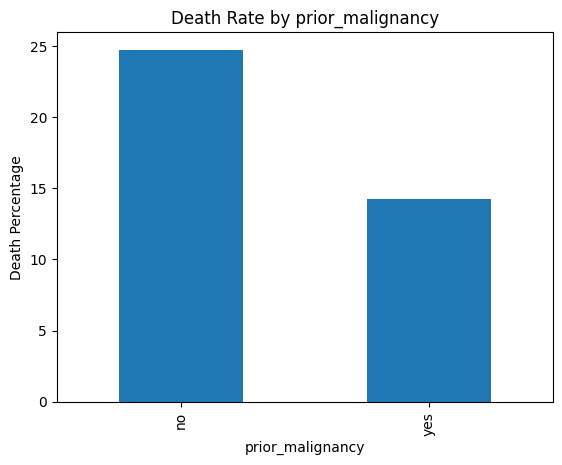

prior_malignancy
no     24.750499
yes    14.285714
Name: vital_status, dtype: float64

In [100]:
import matplotlib.pyplot as plt


# Группировка данных по наличию злокачественности опухолей в прошлом и вычисление смертности
death_by_grade = (unique_cases[unique_cases['vital_status'] == 'Dead'].groupby('prior_malignancy')['vital_status'].count() / unique_cases.groupby('prior_malignancy')['vital_status'].count()) * 100


# Визуализация результатов
death_by_grade.plot(kind='bar')
plt.xlabel('prior_malignancy')
plt.ylabel('Death Percentage')
plt.title('Death Rate by prior_malignancy')
plt.show()

death_by_grade

Из результатов видно, что процент смертности среди пациентов без предыдущих случаев злокачественных опухолей (24.75%) выше по сравнению с пациентами, у которых в прошлом были такие случаи (14.29%). Это может указывать на то, что наличие предыдущих злокачественных опухолей влияет на прогноз выживаемости пациента и может оказывать некоторое влияние на ход заболевания.

<ipython-input-111-08aa4a201094>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_cases['age_bins'] = pd.cut(unique_cases['age_at_index'], bins=bins, labels=labels, right=False)


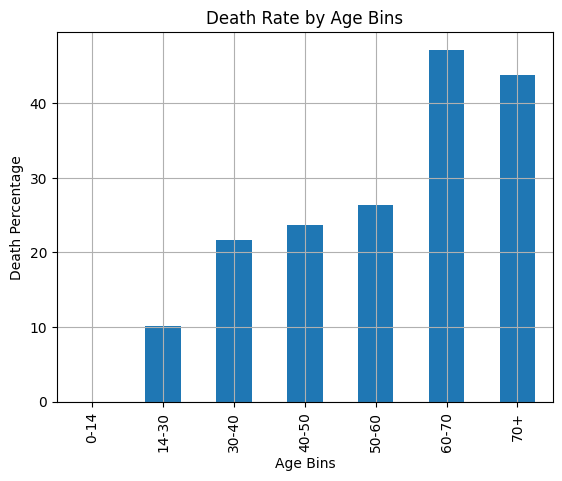

In [111]:
import matplotlib.pyplot as plt
import numpy as np

# Создание корзин возрастов
bins = [0, 14, 30, 40, 50, 60, 70, np.inf]
labels = ['0-14', '14-30', '30-40', '40-50', '50-60', '60-70', '70+']

# Добавление столбца с возрастными корзинами в данные
unique_cases['age_bins'] = pd.cut(unique_cases['age_at_index'], bins=bins, labels=labels, right=False)

# Группировка данных по корзинам возрастов и вычисление смертности
death_by_age_bins = (unique_cases['vital_status'] == 'Dead').groupby(unique_cases['age_bins']).mean() * 100

# Визуализация результатов
death_by_age_bins.plot(kind='bar')
plt.xlabel('Age Bins')
plt.ylabel('Death Percentage')
plt.title('Death Rate by Age Bins')
plt.grid()
plt.show()


На основе полученных данных о проценте смертности в различных возрастных группах можно сделать несколько выводов:

- Смертность увеличивается с возрастом: Смертность растет с возрастом, что является ожидаемым явлением. Наиболее высокий процент смертности наблюдается в группе пациентов старше 80 лет.

- Более высокая смертность после 60 лет: Заметно увеличение смертности после 60 лет, особенно резкое возрастание в группе 60-70 лет. Это может указывать на увеличение риска серьезных заболеваний или трудностей в лечении с возрастом.

- Низкая смертность у детей и молодых взрослых: В группах до 40 лет процент смертности существенно ниже, что может свидетельствовать о более высокой успешности лечения или отсутствии тяжелых заболеваний в данной возрастной группе.

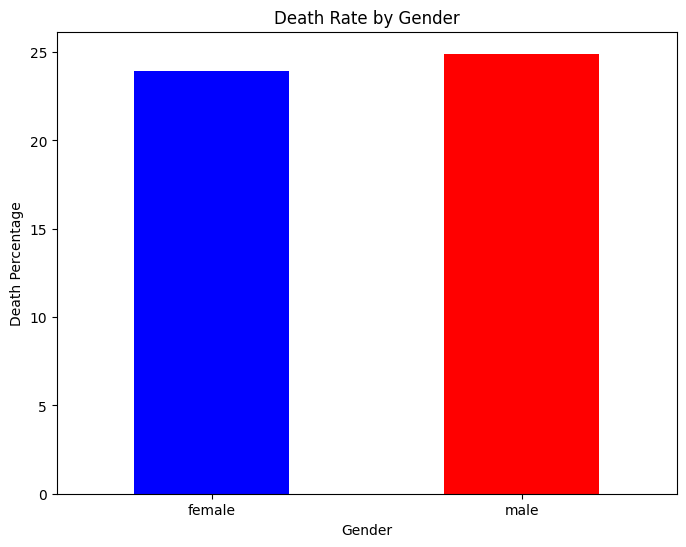

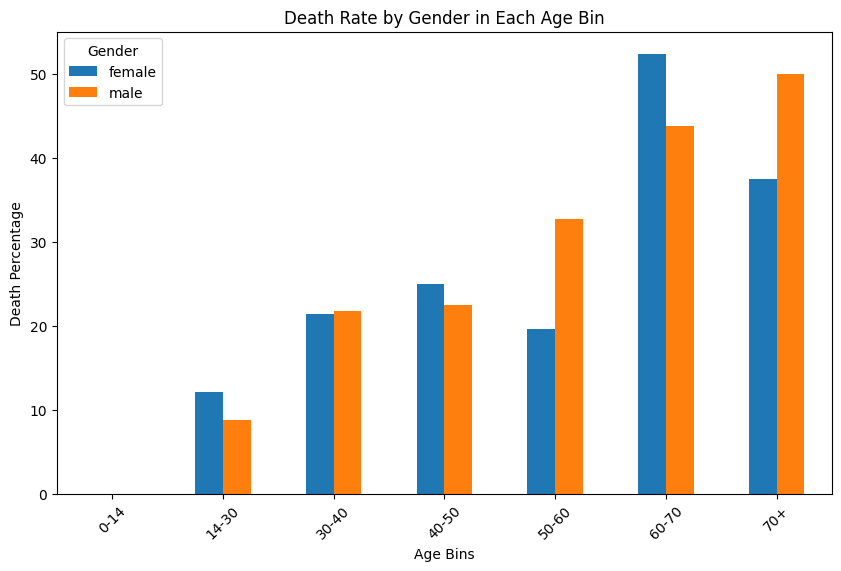

In [112]:
# Группировка данных по гендеру и вычисление смертности
death_by_gender = unique_cases.groupby('gender')['vital_status'].apply(lambda x: (x == 'Dead').sum() / len(x) * 100)

# Визуализация смертности по гендеру
plt.figure(figsize=(8, 6))
death_by_gender.plot(kind='bar', color=['blue', 'red'])
plt.xlabel('Gender')
plt.ylabel('Death Percentage')
plt.title('Death Rate by Gender')
plt.xticks(rotation=0)
plt.show()

# Группировка данных по гендеру и возрастным корзинам, вычисление смертности
death_by_gender_age = unique_cases.groupby(['age_bins', 'gender'])['vital_status'].apply(lambda x: (x == 'Dead').sum() / len(x) * 100)

# Визуализация смертности по гендеру в каждой возрастной группе
death_by_gender_age.unstack().plot(kind='bar', figsize=(10, 6))
plt.xlabel('Age Bins')
plt.ylabel('Death Percentage')
plt.title('Death Rate by Gender in Each Age Bin')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()


In [113]:
unique_cases['age_bins'].value_counts().sort_index()

0-14       0
14-30     79
30-40    162
40-50    110
50-60     95
60-70     53
70+       16
Name: age_bins, dtype: int64

Из этих данных видно, что смертность у мужчин и женщин имеет разные тенденции в зависимости от возрастной группы. Например, в возрастной группе от 60 до 70 лет смертность у женщин значительно выше, чем у мужчин. В то же время, в возрастной группе от 50 до 60 лет смертность у мужчин превышает смертность у женщин. Эти различия в смертности могут быть связаны с различными факторами, такими как болезни, стиль жизни или доступность медицинской помощи. Соответственно гендер не влияет или влияет не значительно на смертность при данном виде опухоли.